# Importing Libraries

In [74]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.manifold import TSNE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Data Reading and Visualisation

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Hence dataset is balanced

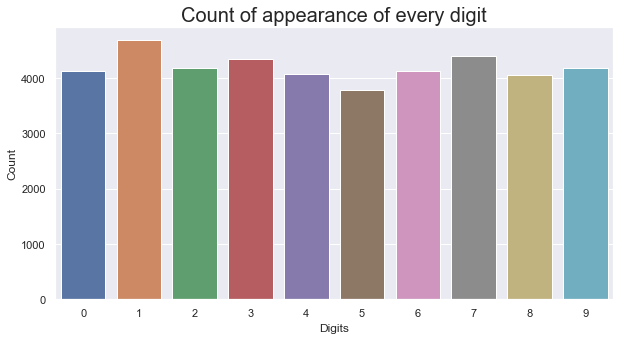

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(data.label)
plt.xlabel("Digits")
plt.ylabel("Count")
plt.title("Count of appearance of every digit",size = 20)
plt.show()

# Preprocessing

In [7]:
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

No null values

In [8]:
X= data.drop(["label"],axis = 1)
Y = data["label"]

X = X/255
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


# Dimentionality Reduction

In [12]:
X_embedded = TSNE(n_components=2).fit_transform(X)

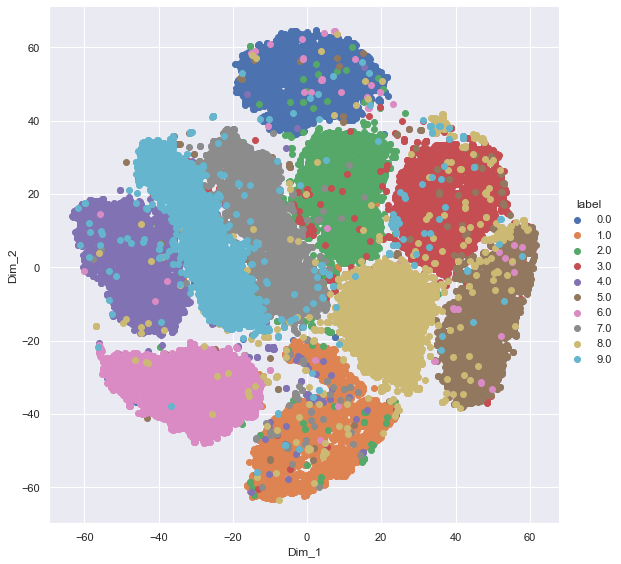

In [18]:
tsne_data = np.vstack((X_embedded.T, Y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", size=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [9]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,Y,test_size =  0.2)
print(Xtrain.shape , Ytrain.shape)
print(Xtest.shape , Ytest.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


# Modelling

In [10]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(Xtrain, Ytrain)

RandomForestClassifier(n_jobs=-1)

In [76]:
Ypred = model.predict(Xtest)
print(accuracy_score(Ytest , Ypred))
print(confusion_matrix(Ytest , Ypred))

0.9642857142857143
[[804   0   2   0   0   1   1   0   4   1]
 [  0 895   5   4   0   0   2   1   2   2]
 [  3   3 795   6   5   0   6   6   4   1]
 [  1   1  16 820   0  13   0   7   9   3]
 [  2   2   1   0 845   0   5   1   1  22]
 [  5   1   0  11   1 688   5   0   5   1]
 [  1   1   1   0   1   2 837   0   3   0]
 [  0   6   8   2   7   0   0 828   1  12]
 [  1   2   2  10   4   6   1   0 780   7]
 [  7   2   0  12   7   3   1  10   8 808]]


Accuracy :  0.9642857142857143


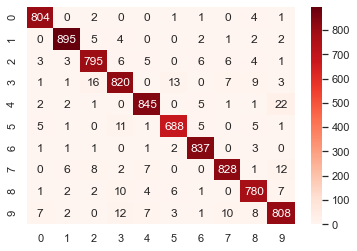

In [68]:
print("Accuracy : ", accuracy_score(Ytest , Ypred))
sns.heatmap(confusion_matrix(Ytest , Ypred), annot=True, fmt='', cmap='Reds')
plt.grid(b=None)
plt.show()

# Testing and Visualisation of Prediction

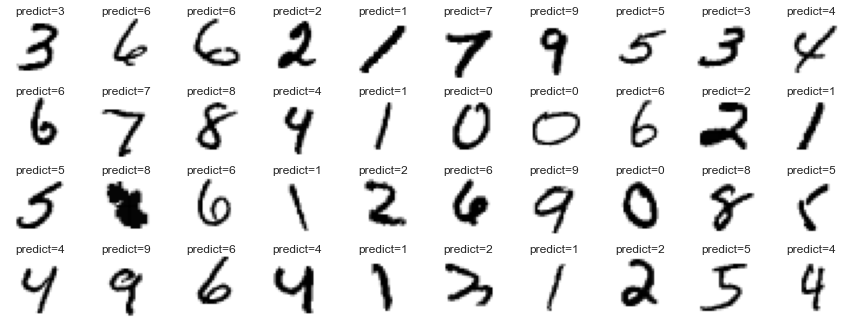

In [72]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(Xtest.values[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % Ypred[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()